# lab 9 iris

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loading iris Data

In [259]:
iris = load_iris()

print("iris Data:")
print (iris)

iris Data:
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 

Store the features of the iris data set into a "features" variable.

In [260]:
features = iris.data.T

sepal_length = features[0]
sepal_width = features[1]
petal_length = features[2]
pental_width = features[3]


sepal_length_label = iris.feature_names[0]
sepal_width_label = iris.feature_names[1]
petal_length_label = iris.feature_names[2]
petal_width_label = iris.feature_names[3]

Plot petal length against sepal width

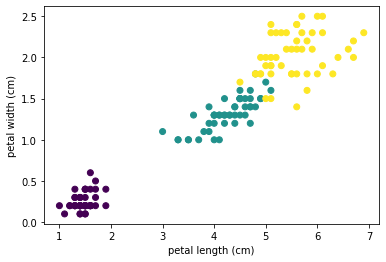

In [261]:
plt.scatter(petal_length, pental_width, c=iris.target)
plt.xlabel(petal_length_label)
plt.ylabel(petal_width_label)

plt.show()

Plot sepal length against sepal width:

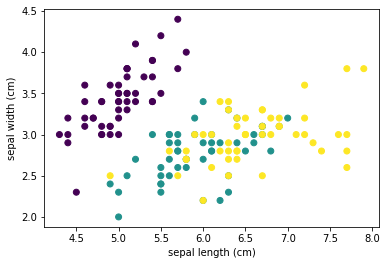

In [262]:
plt.scatter(sepal_length, sepal_width, c=iris.target)
plt.xlabel(sepal_length_label)
plt.ylabel(sepal_width_label)

plt.show()

 Plot petal length against sepal width#

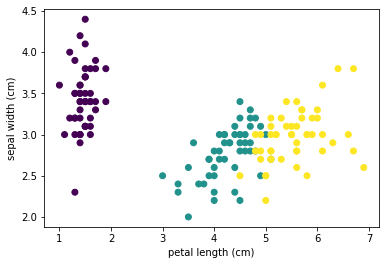

In [263]:
plt.scatter(petal_length, sepal_width, c=iris.target)
plt.xlabel(petal_length_label)
plt.ylabel(sepal_width_label)

plt.show()

In [264]:

dataset=load_iris()
data=pd.DataFrame(dataset['data'], columns=["Petal length","Petal Width","Sepal Length","Sepal Width"] )
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

data.loc[data.loc[:, 'Species'] != 'virginica', 'Species'] = 0
data.loc[data.loc[:, 'Species'] == 'virginica', 'Species'] = 1

print(data)

     Petal length  Petal Width  Sepal Length  Sepal Width Species
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       1
146           6.3          2.5           5.0          1.9       1
147           6.5          3.0           5.2          2.0       1
148           6.2          3.4           5.4          2.3       1
149           5.9          3.0           5.1          1.8       1

[150 rows x 5 columns]


Based on plots below I choose Petal Length and Sepal Width to KNN model

In [265]:
X = data.loc[:, ['Petal length', 'Sepal Width']].values 
y = data.loc[:, ['Species']].values

ROC_y = []
ROC_x = []
ROC_points = []

# ax = plt.subplots()

Neighbours classifier from 1 neighbour to 5.

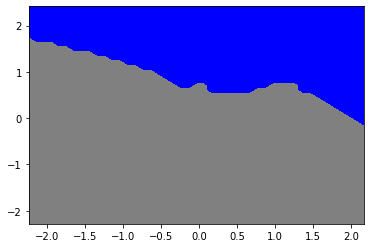

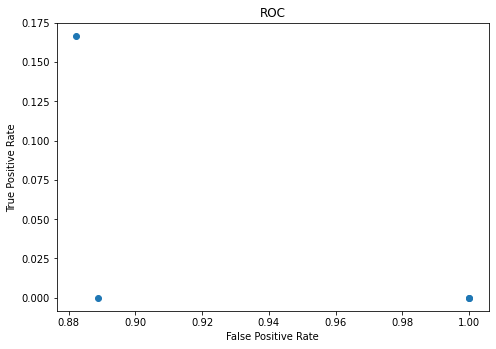

In [266]:
for neighboursSize in range(1, 5):
    # split into test set and train set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
    
    
    # feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # fit the model
    classifier = KNeighborsClassifier(n_neighbors = neighboursSize)
    classifier.fit(X_train, y_train.ravel().astype(int))
    
    # predict data
    y_pred = classifier.predict(X_test)
  
    # confusion matrix
    cm = confusion_matrix(y_test.ravel().astype(int), y_pred)
    tp = cm[0][0]
    fn = cm[1][0]
    fp = cm[0][1]
    tn = cm[1][1]
    
    rocX= (tp / (tp + fn))
    rocY= (fp / (fp + tn))
    ROC_x.append(rocX)
    ROC_y.append(rocY)
    ROC_points.append((rocX, rocY))
    
    # visualize the result
    X_set, y_set = X_test, y_test
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  cmap = ListedColormap(('grey', 'blue')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter([x for x, _ in ROC_points], [y for _, y in ROC_points])

ax.set_xlabel(f'False Positive Rate')
ax.set_ylabel(f'True Positive Rate')
ax.set_title(f'ROC')

plt.show()

In [274]:
print("AUC: " , metrics.auc(ROC_y, ROC_x))


AUC:  0.1568627450980392
